# Stop words
** In every language, there are words that occur too frequently and are not very informative. Sometimes, it is useful to get rid of them before we build a machine learning model.**

# What are stop words and how to find them?

**Stop words: words that occur too frequently and not considered informative**

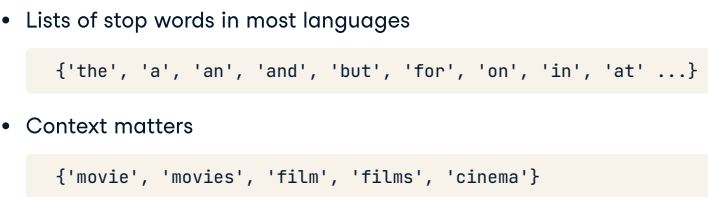

**But how do we know which words are not informative? In every language, there is a set of words that most practitioners agree are not useful and should be removed when performing a natural language processing task.**

# Stop words with word clouds

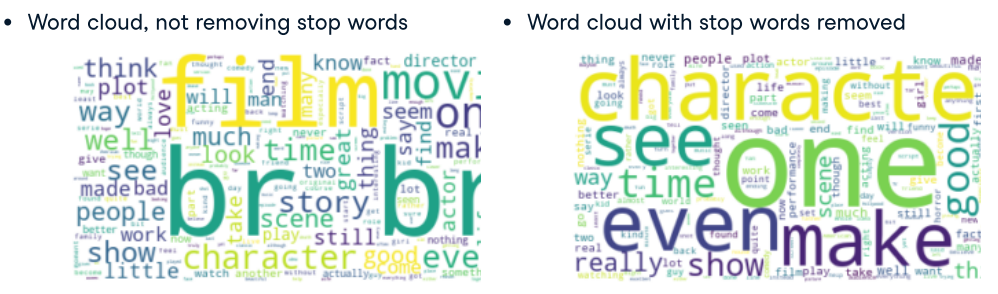

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("IMDB_sample.csv")

In [3]:
data.dtypes

Unnamed: 0     int64
review        object
label          int64
dtype: object

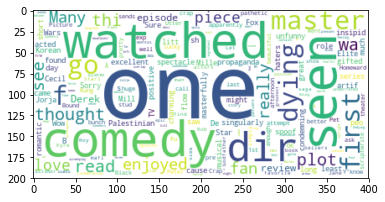

In [8]:
# Import libraries
from wordcloud import WordCloud, STOPWORDS
# Define the stopwords list
my_stopwords = set(STOPWORDS)
my_stopwords.update(["movie","movies","film","films","watch","br"]) #Extending my stop words 
# Generate and show the word cloud
my_cloud = WordCloud(background_color='white',stopwords=my_stopwords).generate(str(data.review))
plt.imshow(my_cloud, interpolation='bilinear')
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# Define the set of stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['film','movie','cinema','theatre'])

In [12]:
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(data.review)
X = vect.transform(data.review)

In [14]:
X #Sparse Matrix

<7501x45529 sparse matrix of type '<class 'numpy.int64'>'
	with 661212 stored elements in Compressed Sparse Row format>

In [15]:
my_array = X.toarray()
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())

In [18]:
tweet=pd.read_csv('Tweets.csv')

In [21]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [23]:
text_tweet=str(tweet['text'])

In [24]:
text_tweet

'0                      @VirginAmerica What @dhepburn said.\n1        @VirginAmerica plus you\'ve added commercials t...\n2        @VirginAmerica I didn\'t today... Must mean I n...\n3        @VirginAmerica it\'s really aggressive to blast...\n4        @VirginAmerica and it\'s a really big bad thing...\n5        @VirginAmerica seriously would pay $30 a fligh...\n6        @VirginAmerica yes, nearly every time I fly VX...\n7        @VirginAmerica Really missed a prime opportuni...\n8          @virginamerica Well, I didn\'t…but NOW I DO! :-D\n9        @VirginAmerica it was amazing, and arrived an ...\n10       @VirginAmerica did you know that suicide is th...\n11       @VirginAmerica I &lt;3 pretty graphics. so muc...\n12       @VirginAmerica This is such a great deal! Alre...\n13       @VirginAmerica @virginmedia I\'m flying your #f...\n14                                  @VirginAmerica Thanks!\n15           @VirginAmerica SFO-PDX schedule is still MIA.\n16       @VirginAmerica So excite

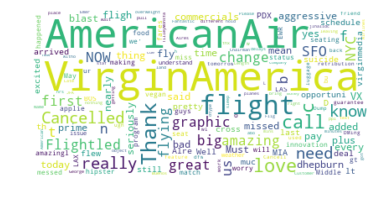

In [27]:
# Import the word cloud function 
from wordcloud import WordCloud

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

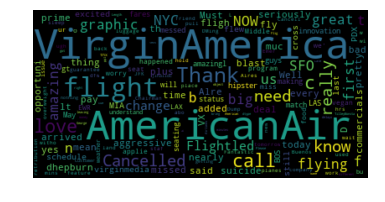

In [28]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

Note : **Do you notice any changes in the first word cloud where you did not remove the stop words and the second one, where you removed them? If the change is not so obvious, perhaps the list of stop words needs to be enriched further.**

In [29]:
text_tweet1=(tweet['text']) #Pandas as Series

In [30]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])


# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(text_tweet1)

# Create the bow representation
X_review = vect.transform(text_tweet1)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am     ...      \
0   0    0       0       0      0       0     0     0    0     0     ...       
1   0    0       0       0      0       0     0     0    0     0     ...       
2   0    0       0       0      0       0     0     0    0     0     ...       
3   0    0       0       0      0       0     0     0    0     0     ...       
4   0    0       0       0      0       0     0     0    0     0     ...       

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5

# Multiple text columns

In some situations, you might have more than one text column in a dataset and you might want to create a numeric representation for each of the text columns. Here, besides the text column, which contains the body of the tweet, there is a second text column, called negativereason. It contains the reason the customer left a negative review.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
x = v.fit_transform(tweet['negativereason'].values.astype('U'))

## Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

## Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
## Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(text_tweet1)
#vect2.fit(tweet['negativereason'])
vect2.fit(x)

## Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names())
print(vect2.get_feature_names())

# Capturing a token pattern

while working with the airline sentiment data from Twitter that the text contains many digits and other characters. Sometimes we may want to exclude them from our numeric representation.

## String operators and comparisons

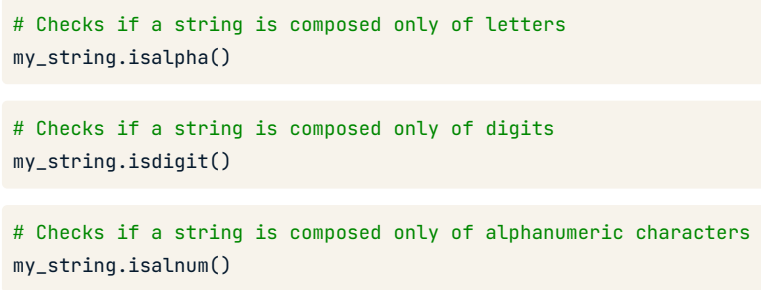

# List Comprehension
List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.

# Example:

Based on a list of fruits, you want a new list, containing only the fruits with the letter "a" in the name.

Without list comprehension you will have to write a for statement with a conditional test inside:

In [32]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"] #list 
newlist = [] #newlist

for x in fruits:
  if "a" in x:
    newlist.append(x)

print(newlist)

['apple', 'banana', 'mango']


## With list comprehension you can do all that with only one line of code:

In [34]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

newlist = [x for x in fruits if "a" in x]

print(newlist)

['apple', 'banana', 'mango']


# String operators with list comprehension

In [35]:
reviews= pd.read_csv('amazon_reviews_sample.csv')

In [36]:
reviews.dtypes

Unnamed: 0     int64
score          int64
review        object
dtype: object

In [37]:
from nltk import word_tokenize

# Original word tokenization
word_tokens = [word_tokenize(review) for review in reviews.review]

In [38]:
# Keeping only tokens composed of letters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]

In [39]:
cleaned_tokens

[['Stuning',
  'even',
  'for',
  'the',
  'This',
  'sound',
  'track',
  'was',
  'beautiful',
  'It',
  'paints',
  'the',
  'senery',
  'in',
  'your',
  'mind',
  'so',
  'well',
  'I',
  'would',
  'recomend',
  'it',
  'even',
  'to',
  'people',
  'who',
  'hate',
  'vid',
  'game',
  'music',
  'I',
  'have',
  'played',
  'the',
  'game',
  'Chrono',
  'Cross',
  'but',
  'out',
  'of',
  'all',
  'of',
  'the',
  'games',
  'I',
  'have',
  'ever',
  'played',
  'it',
  'has',
  'the',
  'best',
  'music',
  'It',
  'backs',
  'away',
  'from',
  'crude',
  'keyboarding',
  'and',
  'takes',
  'a',
  'fresher',
  'step',
  'with',
  'grate',
  'guitars',
  'and',
  'soulful',
  'orchestras',
  'It',
  'would',
  'impress',
  'anyone',
  'who',
  'cares',
  'to',
  'listen'],
 ['The',
  'best',
  'soundtrack',
  'ever',
  'to',
  'anything',
  'I',
  'reading',
  'a',
  'lot',
  'of',
  'reviews',
  'saying',
  'that',
  'this',
  'is',
  'the',
  'best',
  'soundtrack',
  'a

In [40]:
len(word_tokens[0])

87

In [41]:
len(cleaned_tokens[0])

78

# Regular expressions

**Regular expressions are a standard way to extract certain characters from a string. Python has a built-in package, called re, which allows you to work with regular expressions**

In [42]:
import re
my_string = '#Wonderfulday'
# Extract #, followed by any letter, small or capital
x = re.search('#[A-Za-z]', my_string)

In [43]:
x

<_sre.SRE_Match object; span=(0, 2), match='#W'>

# Token pattern with a BOW

In [44]:
# Default token pattern in CountVectorizer
'\b\w\w+\b'

'\x08\\w\\w+\x08'

In [45]:
# Specify a particular token pattern
CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b')

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b',
        tokenizer=None, vocabulary=None)

In [46]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweet['text'])
vect.transform(tweet['text'])
print('Length of vectorizer: ', len(vect.get_feature_names()))

Length of vectorizer:  11893


In [47]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweet['text'])
vect1.transform(tweet['text'])

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweet['text'])
vect2.transform(tweet['text'])

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


**Did you notice how fewer features were created when we specified the token pattern? It is a nice way to limit the size of our vocabulary and make sure we only include certain tokens when we create it.**

In [48]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweet['text']]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


**Did you notice how the list of word tokens changes before and after the filtering out of non-alphabetic characters?**

In [50]:
tweets_list=["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

In [51]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


# Stemming and lemmatization

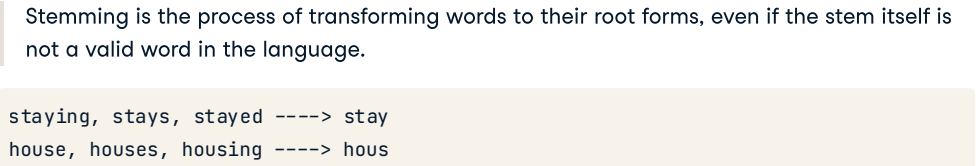

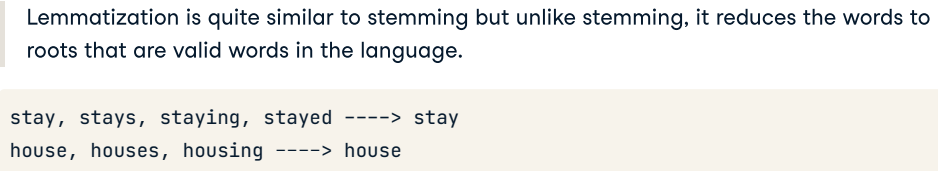

# Stemming vs. lemmatization

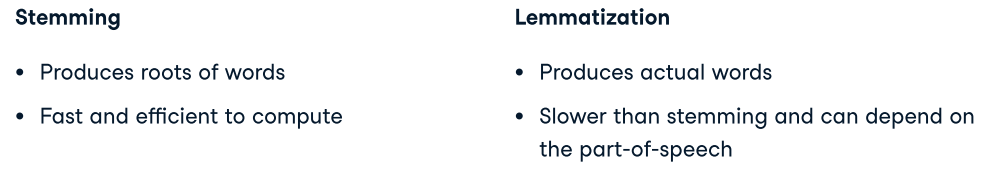

In [53]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('wonderful')

'wonder'

**One popular stemming library is the PorterStemmer in the nltk.stem package. The PorterStemmer is not the only stemmer in nltk but it's quite fast and easy to use, so it's often a standard choice. We call the PorterStemmer function and store it under the name porter. We can then call porter.stem on a string, for example, 'wonderful'. The result is 'wonder'.**

# Non-English stemmers

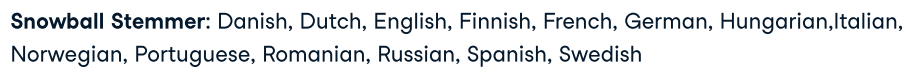

In [54]:
from nltk.stem.snowball import SnowballStemmer

In [56]:
DutchStemmer = SnowballStemmer("dutch")
DutchStemmer.stem("beginnen")

'beginn'

# How to stem a sentence?

In [57]:
porter.stem('Today is a wonderful day!')

'today is a wonderful day!'

**If you apply the PorterStemmer on a sentence, the result is the original sentence. We see nothing has changed about our 'Today is a wonderful day!' sentence. We need to stem each word in the sentence separately. Therefore, as a first step, we need to transform the sentence into tokens using the familiar word_tokenize function. In the second step, we apply the stemming function on each word of the sentence, using a list comprehension.**

In [58]:
from nltk import word_tokenize
tokens = word_tokenize('Today is a wonderful day!')
stemmed_tokens = [porter.stem(token) for token in tokens]
stemmed_tokens

['today', 'is', 'a', 'wonder', 'day', '!']

**we need to transform the sentence into tokens using the familiar word_tokenize function. In the second step, we apply the stemming function on each word of the sentence, using a list comprehension.**

# Lemmatization of a string

In [60]:
from nltk.stem import WordNetLemmatizer
WNlemmatizer = WordNetLemmatizer()

In [61]:
WNlemmatizer.lemmatize('wonderful', pos='a')

'wonderful'

**we need to transform the sentence into tokens using the familiar word_tokenize function. In the second step, we apply the stemming function on each word of the sentence, using a list comprehension.**

In [62]:
GoT='Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

In [63]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = porter.stem(GoT) 

In [65]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 


# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0
Stemmed tokens:  ['n', 'e', 'v', 'e', 'r', ' ', 'f', 'o', 'r', 'g', 'e', 't', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ',', ' ', 'f', 'o', 'r', ' ', 's', 'u', 'r', 'e', 'l', 'y', ' ', 't', 'h', 'e', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 'n', 'o', 't', '.', ' ', 'm', 'a', 'k', 'e', ' ', 'i', 't', ' ', 'y', 'o', 'u', 'r', ' ', 's', 't', 'r', 'e', 'n', 'g', 't', 'h', '.', ' ', 't', 'h', 'e', 'n', ' ', 'i', 't', ' ', 'c', 'a', 'n', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'b', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'w', 'e', 'a', 'k', 'n', 'e', 's', 's', '.', ' ', 'a', 'r', 'm', 'o', 'u', 'r', ' ', 'y', 'o', 'u', 'r', 's', 'e', 'l', 'f', ' ', 'i', 'n', ' ', 'i', 't', ',', ' ', 'a', 'n', 'd', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'b', 'e', ' ', 'u', 's', 'e', 'd', ' ', 't', 'o', ' ', 'h', 'u', 'r', 't', ' ', 'y', 'o', 'u', '.']


In [67]:
import time

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  0.0019989013671875
Lemmatized tokens:  ['n', 'e', 'v', 'e', 'r', ' ', 'f', 'o', 'r', 'g', 'e', 't', ' ', 'w', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'a', 'r', 'e', ',', ' ', 'f', 'o', 'r', ' ', 's', 'u', 'r', 'e', 'l', 'y', ' ', 't', 'h', 'e', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'w', 'i', 'l', 'l', ' ', 'n', 'o', 't', '.', ' ', 'm', 'a', 'k', 'e', ' ', 'i', 't', ' ', 'y', 'o', 'u', 'r', ' ', 's', 't', 'r', 'e', 'n', 'g', 't', 'h', '.', ' ', 't', 'h', 'e', 'n', ' ', 'i', 't', ' ', 'c', 'a', 'n', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'b', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'w', 'e', 'a', 'k', 'n', 'e', 's', 's', '.', ' ', 'a', 'r', 'm', 'o', 'u', 'r', ' ', 'y', 'o', 'u', 'r', 's', 'e', 'l', 'f', ' ', 'i', 'n', ' ', 'i', 't', ',', ' ', 'a', 'n', 'd', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'b', 'e', ' ', 'u', 's', 'e', 'd', ' ', 't', 'o', ' ', 'h', 'u', 'r', 't', ' ', 'y', 'o', 'u', '.']


In [68]:
tweet.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
7        @VirginAmerica Really missed a prime opportuni...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
10       @VirginAmerica did you know that suicide is th...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I'm flying your #f...
14                                  @VirginAmerica Thanks!
15           @VirginAmerica SFO-PDX schedule is still MIA.
16       @VirginAmerica So excited for my first cross c.

In [69]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweet) for tweet in tweet.text]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
print(stemmed_tokens[0])




['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


**You have created your own list of tokens and turned them into stems! Are there other ways we can still improve the output of our tokenization and numerical representation from text?**

# TfIdf: More ways to transform text

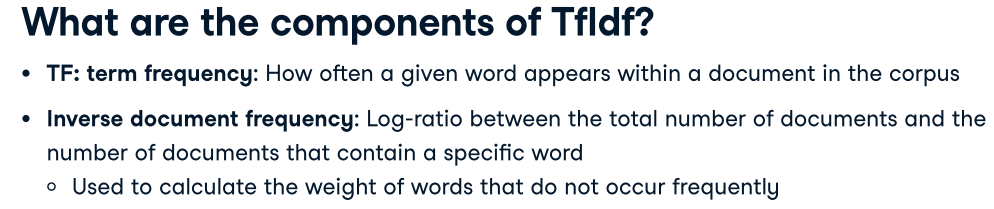

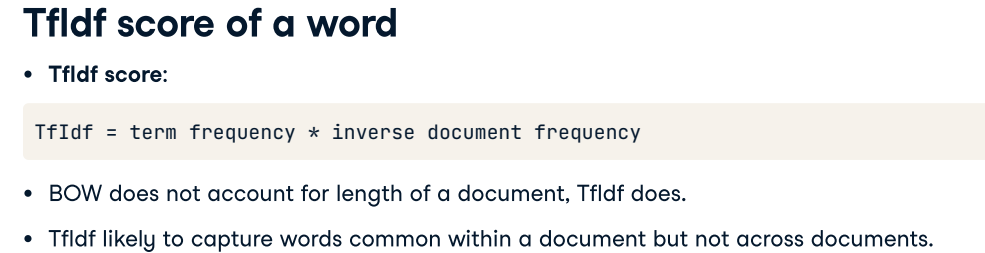

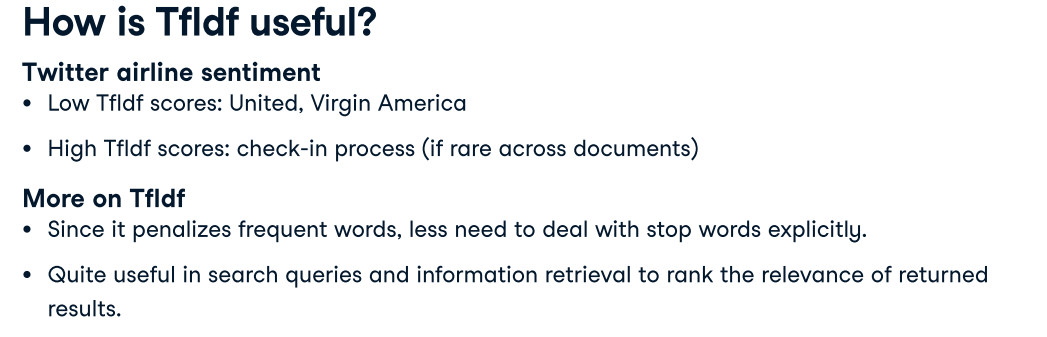

In [73]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In Python, you can apply TfIdf by importing the TfidfVectorizer from sklearn.feature_extraction.text. The TfIdfVectorizer is similar to the CountVectorizer, and so are the arguments it takes. We can define the maximum number of features by max_features, the type of n-grams to use by specifying ngrams_range, the stop_words argument, token_pattern, max_df and min_df. We fit the TfidfVectorizer to the text column of the tweets dataset. Then we transform it, the same way we did with the CountVectorizer.

In [74]:
vect = TfidfVectorizer(max_features=100).fit(tweet.text)
X = vect.transform(tweet.text)

In [75]:
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
X_df.head()

,about,after,again,airline,all,am,americanair,amp,an,and,...,was,we,what,when,why,will,with,would,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.668165,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.32904,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.431149,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.332355
4,0.494872,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.279754,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000


The Tfidfvectorizer also returns a **sparse matrix**. If you recall, **a sparse matrix is a matrix with mostly zero values, storing only the non-zero values.** We need to transform the sparse matrix to an array and specify the feature names, using the same syntax as with the CountVectorizer. Inspecting the top 5 rows of the newly created dataset, we see that the output is quite similar to a BOW. Each column is a feature and each row contains the TfIdf score of the feature in a given tweet. The values are floating numbers, and many of them are zero.

In [76]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer(max_features=100).fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[ 0.4472136   0.4472136   0.4472136   0.          0.4472136   0.
   0.4472136   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.30151134  0.          0.30151134
   0.          0.30151134  0.30151134  0.30151134  0.30151134  0.60302269
   0.30151134]]


**You have built your first numeric representation of text by applying a TfIdf vectorizer. Do you recall building a bag-of-words representation for the same data earlier? What differences do you notice?**

In [77]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1,2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweet.text)

# Transform the vectorizer
X_txt = vect.transform(tweet.text)
 
# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled ...         ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0 ...   0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0 ...   0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0 ...   0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0 ...   0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0 ...   0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

You now can succesfully apply two different methods to transform a text column of any kind to a numeric form. We need to implement this step in order to apply a supervised machine learning model to a sentiment analysis problem.

In [79]:
# Import the required packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review)

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
print('Top 5 rows, using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows, using BOW: 
    about  after  all  also  am  an  and  any  are  as  ...   what  when  \
0      0      0    1     0   0   0    2    0    0   0  ...      0     0   
1      0      0    0     0   0   0    3    1    1   0  ...      0     0   
2      0      0    3     0   0   1    4    0    1   1  ...      0     0   
3      0      0    0     0   0   0    9    0    1   0  ...      0     0   
4      0      1    0     0   0   0    3    0    1   0  ...      0     0   

   which  who  will  with  work  would  you  your  
0      0    2     0     1     0      2    0     1  
1      0    0     0     0     0      1    1     0  
2      1    1     0     0     1      1    2     0  
3      0    0     0     0     0      0    0     0  
4      0    0     0     0     0      0    3     1  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also   am       an       and       any  \
0    0.0  0.000000  0.138970   0.0  0.0  0.00000  0.140823  0.000000   
1    0.0  0.000000

**Which approach should you select? That usually depends on the context and on how well they perform when used with a machine learning model.**